# NSERC Project: _B. subtilis_ Essential Gene Dataset Assembly
Author: __Nashira H. Ridgeway__
<br>
Created: _Monday, July 7th, 2025_
<br>
Last Modified: _Monday, July 10th, 2025_

This notebook depicts the import and cleaning of various datasets of essential genes for _B. subtilis_, as gathered from various publications. A combined total of 3 datasets included represent different methodologies for determining gene essentiality.<br><br> The methods applied can be split into two basic approaches:
<br>
__(1)__ - __The targeted deletion of individual genes__, as represented by the Kobayashi _et. al._ 2003 publication and the Koo _et. al._ 2017 publication [1,2].
<br>
__(3)__ - __Targeted mutagenesis (CRISPRi)__, applied guide RNAs to selectively target every "essential" (deemed as essential from Kobayashi _et. al._ 2003) gene for confirmation [3].
<br>

<br> In addition to formatting, a visualization of the deviations and similarities between each dataset will be compiled through an UpSet Plot. To effectively translate gene identifiers for later experiments, SubtiWiki [4] will be employed. 
***


[1] _K. Kobayashi, S.D. Ehrlich, A. Albertini, G. Amati, K.K. Andersen, M. Arnaud, K. Asai, S. Ashikaga, S. Aymerich, P. Bessieres, F. Boland, S.C. Brignell, S. Bron, K. Bunai, J. Chapuis, L.C. Christiansen, A. Danchin, M. Débarbouillé, E. Dervyn, E. Deuerling, K. Devine, S.K. Devine, O. Dreesen, J. Errington, S. Fillinger, S.J. Foster, Y. Fujita, A. Galizzi, R. Gardan, C. Eschevins, T. Fukushima, K. Haga, C.R. Harwood, M. Hecker, D. Hosoya, M.F. Hullo, H. Kakeshita, D. Karamata, Y. Kasahara, F. Kawamura, K. Koga, P. Koski, R. Kuwana, D. Imamura, M. Ishimaru, S. Ishikawa, I. Ishio, D. Le Coq, A. Masson, C. Mauël, R. Meima, R.P. Mellado, A. Moir, S. Moriya, E. Nagakawa, H. Nanamiya, S. Nakai, P. Nygaard, M. Ogura, T. Ohanan, M. O'Reilly, M. O'Rourke, Z. Pragai, H.M. Pooley, G. Rapoport, J.P. Rawlins, L.A. Rivas, C. Rivolta, A. Sadaie, Y. Sadaie, M. Sarvas, T. Sato, H.H. Saxild, E. Scanlan, W. Schumann, J.F.M.L. Seegers, J. Sekiguchi, A. Sekowska, S.J. Séror, M. Simon, P. Stragier, R. Studer, H. Takamatsu, T. Tanaka, M. Takeuchi, H.B. Thomaides, V. Vagner, J.M. van Dijl, K. Watabe, A. Wipat, H. Yamamoto, M. Yamamoto, Y. Yamamoto, K. Yamane, K. Yata, K. Yoshida, H. Yoshikawa, U. Zuber, & N. Ogasawara, Essential Bacillus subtilis genes, Proc. Natl. Acad. Sci. U.S.A. 100 (8) 4678-4683, https://doi.org/10.1073/pnas.0730515100 (2003)._<br>
[2] _Koo, Byoung-Mo, George Kritikos, Jeremiah D. Farelli, Horia Todor, Kenneth Tong, Harvey Kimsey, Ilan Wapinski, et al. “Construction and Analysis of Two Genome-Scale Deletion Libraries for Bacillus Subtilis.” Cell Systems 4, no. 3 (March 22, 2017): 291-305.e7. https://doi.org/10.1016/j.cels.2016.12.013._<br>
[3] _Peters JM, Colavin A, Shi H, Czarny TL, Larson MH, Wong S, Hawkins JS, Lu CHS, Koo BM, Marta E, Shiver AL, Whitehead EH, Weissman JS, Brown ED, Qi LS, Huang KC, Gross CA. A Comprehensive, CRISPR-based Functional Analysis of Essential Genes in Bacteria. Cell. 2016 Jun 2;165(6):1493-1506. doi: 10.1016/j.cell.2016.05.003. Epub 2016 May 26. PMID: 27238023; PMCID: PMC4894308._<br>
[4] _Elfmann, Christoph, Vincenz Dumann, Tim van den Berg, and Jörg Stülke. “A New Framework for SubtiWiki, the Database for the Model Organism Bacillus Subtilis.” Nucleic Acids Research 53, no. D1 (January 6, 2025): D864–70. https://doi.org/10.1093/nar/gkae957._<br>

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import itertools
from upsetplot import plot
from matplotlib import pyplot

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Format Data for Proper Comparison
<br>
Each of our datasets are obtained from differing publications and as a result contain a variety of symbols for labelling and formatting. In this first step, we need to obtain consistency so we can effectively compare the data represented by each approach.

In [18]:
#### IMPORT #####
# Import the associated datasets
k_ess = pd.read_csv('Kobayashi_2003_B_Subtilis_Essential.txt', sep='\t')
k_ns = pd.read_csv('Kobayashi_2003_B_Subtilis_NonEssential.txt', sep='\t')

koo_ess = pd.read_csv('Koo_2017_Essential_Genes.csv')
koo_erm = pd.read_csv('Koo_2017_ErmR_Library.csv').drop(columns=['Unnamed: 3', 'Unnamed: 4'])
koo_kan = pd.read_csv('Koo_2017_KanR_Library.csv').drop(columns=['Unnamed: 3', 'Unnamed: 4'])

peters_ess = pd.read_csv('Peters_2016_Essential_Gene_Confirmations_CRISPR_B_Subtilis.csv')


# Import the subtiwiki list for ID translation
sw = pd.read_csv('SubtiWiki_BS_ID_to_Uniprot_IDs.csv')

## Formatting
__Kobayashi:__ The Kobayashi datasets just have gene names -- need to isolate the BSU IDs and Uniprot IDs from these. <br>
__Koo:__ For the Koo datasets, BSU IDs are already there, but we need to add in Uniprot IDs and combine the datasets to get one list, then apply the essential gene set to find the nonessential genes. <br>
__Peters:__ The Peters dataset should use the cleaned Kobayashi dataset for reference (as it is based on that)-- use BSU to isolate within the dataset. <br>

In [403]:
k_ess

,Gene,Product
0,acpA,acyl carrier protein
1,alaS,alanyl-tRNA synthetase
2,argS,arginyl-tRNA synthetase
3,asnS,asparaginyl-tRNA synthetase
4,aspS,aspartyl-tRNA synthetase
...,...,...
74,rpsU,30S ribosomal protein S21
75,serS,seryl-tRNA synthetase
76,ssbA,single-strand binding protein
77,trpS,tryptophanyl-tRNA synthetase


In [ ]:
#### FORMAT THE KOBAYASHI SET ####
# Note: There were changes from the original gene names to those in the SubtiWiki list, so we will rename them within the kobayashi set. 
# Specifically: ssb -> ssbA in k_ess, and amyD -> melD, pheB -> thrR, xsa -> abf2, ytmN -> tcyN in k_ns
#k_ess.loc[k_ess['Gene'] == 'ssb', 'Gene'] = 'ssbA'
#k_ns.loc[k_ns['Gene'] == 'amyD', 'Gene'] = 'melD'
#k_ns.loc[k_ns['Gene'] == 'pheB', 'Gene'] = 'thrR'
#k_ns.loc[k_ns['Gene'] == 'xsa', 'Gene'] = 'abf2'
#k_ns.loc[k_ns['Gene'] == 'ytmN', 'Gene'] = 'tcyN'

searchset = sw[['name', 'outlinks.subtilist', 'outlinks.uniprot']].rename(columns={'name':'Gene', 'outlinks.subtilist':'BG_ID', 'outlinks.uniprot':'Uniprot_ID'})

#k_ess_ann = pd.merge(k_ess, searchset, how='left', on='Gene')
#k_ns_ann = pd.merge(k_ns, searchset, how='left', on='Gene')


In [ ]:
#### THE KOBAYASHI SET REDO ####
# Initial dataset was obtained from the '03 paper, but it only had the newly identified/predicted essential genes. Downloaded full set from the http://bacillus.genome.jp website
# using the wayback machine, manually downloaded each page using inspect element to get the full list of essential and non-essential genes.
kb = pd.read_csv('Kobayashi_2003_B_Subtilis_Essential_and_NonEssential.csv')

In [ ]:
# Isolate essential and nonessential genes
kb['Essentiality'] = 'no'
kb.loc[kb['TW'] == 'yes', 'Essentiality'] = 'yes'
kb.loc[kb['TW'] == 'Yes', 'Essentiality'] = 'yes'
kb.loc[kb['PW'] == 'yes', 'Essentiality'] = 'yes'
kb.loc[kb['PW'] == 'Yes', 'Essentiality'] = 'yes'
kb.loc[kb['Prediction'] == 'yes', 'Essentiality'] = 'yes'
kb.loc[kb['Prediction'] == 'Yes', 'Essentiality'] = 'yes'

kb_ess = kb[kb['Essentiality'] == 'yes'][['BG_ID', 'Gene', 'Synonym']]
kb_ns = kb[kb['Essentiality'] == 'no'][['BG_ID', 'Gene', 'Synonym']]

# Now annotate with the subtiwiki list
kb_ess_t = pd.merge(kb_ess, searchset, how='left', on='Gene', indicator=True)
kb_ns_t = pd.merge(kb_ns, searchset, how='left', on='Gene', indicator=True)

In [230]:
kb_ess_missing = kb_ess_t[kb_ess_t['_merge'] == 'left_only']
kb_ns_missing = kb_ns_t[kb_ns_t['_merge'] == 'left_only']

In [231]:
# Either in the synonyms for the outlinks.expression_browser of the sw set -- clean this up
fixset = sw[['name', 'synonyms', 'outlinks.expression_browser']].rename(columns={'name':'Gene_Name', 'outlinks.expression_browser':'other_synonym'})

# Find the missing genes by the synonyms
for h, r in kb_ess_missing.iterrows():
    g = r['Gene']

    if fixset['synonyms'].str.contains(g).any():
        kb_ess.loc[kb_ess['Gene'] == g, 'Gene'] = r['Gene'] = fixset[fixset['synonyms'].str.contains(g, na=False)]['Gene_Name'].values[0]
    
    if fixset['other_synonym'].str.contains(g).any():
        kb_ess.loc[kb_ess['Gene'] == g, 'Gene'] = r['Gene'] = fixset[fixset['other_synonym'].str.contains(g, na=False)]['Gene_Name'].values[0]

# Find the missing genes by the synonyms
for h, r in kb_ns_missing.iterrows():
    g = r['Gene']

    if fixset['synonyms'].str.contains(g).any():
        kb_ns.loc[kb_ns['Gene'] == g, 'Gene'] = r['Gene'] = fixset[fixset['synonyms'].str.contains(g, na=False)]['Gene_Name'].values[0]
    
    if fixset['other_synonym'].str.contains(g).any():
        kb_ns.loc[kb_ns['Gene'] == g, 'Gene'] = r['Gene'] = fixset[fixset['other_synonym'].str.contains(g, na=False)]['Gene_Name'].values[0]

In [236]:
kb_ess_t1 = pd.merge(kb_ess, searchset, how='left', on='Gene')
kb_ns_t1 = pd.merge(kb_ns, searchset, how='left', on='Gene') # 33 still missing in this set-- assuming they're no longer genes 

In [99]:
#### FORMAT THE KOO SET ####
koo_ess_ann = koo_ess[['locus tag', 'gene']].rename(columns={'locus tag':'BSU_ID', 'gene':'Gene'}).dropna()
koo_ess_ann.loc[koo_ess_ann['Gene'].str.contains(' '), 'Gene'] = koo_ess_ann[koo_ess_ann['Gene'].str.contains(' ')]['Gene'].str.split(' ', expand=True)[0]

# Some still missing -- manually annotate these (removed as this'll throw an error-- but completed manually)
#koo_ess_ann = pd.merge(koo_ess_ann, searchset, how='left', on='Gene', indicator=True)
#koo_ess_ann[koo_ess_ann['_merge'] != 'both'].to_csv('Koo_Missing_Genes_for_Manual_Annotation.csv')
koo_ess_adj = pd.read_csv('Koo_Missing_Genes_Manually_Annotated.csv')

for h, r in koo_ess_adj.iterrows():
    g = r['Gene']
    ag = r['New_Gene']

    if g in koo_ess_ann['Gene'].values:
        koo_ess_ann.loc[koo_ess_ann['Gene'] == g, 'Gene'] = ag

koo_ess_ann = pd.merge(koo_ess_ann, searchset, how='left', on='Gene')

In [150]:
# Now let's annotate the two additional libraries
koo_kan = pd.read_csv('Koo_2017_KanR_Library.csv').drop(columns=['Unnamed: 3', 'Unnamed: 4']).rename(columns={'locus tag':'BSU_ID', 'gene':'Gene', 'BKK#':'BKE_ID'})
koo_erm = pd.read_csv('Koo_2017_ErmR_Library.csv').drop(columns=['Unnamed: 3', 'Unnamed: 4']).rename(columns={'locus tag':'BSU_ID', 'gene':'Gene', 'BKK#':'BKE_ID'})

In [151]:
kk = pd.merge(koo_kan, searchset, how='left', on='Gene', indicator=True)
ke = pd.merge(koo_erm, searchset, how='left', on='Gene', indicator=True)

In [ ]:
# Not all were found :( fix it!
kk_missing = kk[kk['_merge'] != 'both']
ke_missing = ke[ke['_merge'] != 'both']

In [ ]:
for h, r in kk_missing.iterrows():
    g = r['Gene']

    if fixset['synonyms'].str.contains(g).any():
        koo_kan.loc[koo_kan['Gene'] == g, 'Gene'] = r['Gene'] = fixset[fixset['synonyms'].str.contains(g, na=False)]['Gene_Name'].values[0]
    
    if fixset['other_synonym'].str.contains(g).any():
        koo_kan.loc[koo_kan['Gene'] == g, 'Gene'] = r['Gene'] = fixset[fixset['other_synonym'].str.contains(g, na=False)]['Gene_Name'].values[0]


for h, r in ke_missing.iterrows():
    g = r['Gene']

    if fixset['synonyms'].str.contains(g).any():
        koo_erm.loc[koo_erm['Gene'] == g, 'Gene'] = r['Gene'] = fixset[fixset['synonyms'].str.contains(g, na=False)]['Gene_Name'].values[0]
    
    if fixset['other_synonym'].str.contains(g).any():
        koo_erm.loc[koo_erm['Gene'] == g, 'Gene'] = r['Gene'] = fixset[fixset['other_synonym'].str.contains(g, na=False)]['Gene_Name'].values[0]

In [ ]:
# Fixed datasets (no missing values :) )
kk_f = pd.merge(koo_kan, searchset, how='left', on='Gene')
ke_f = pd.merge(koo_erm, searchset, how='left', on='Gene')

In [ ]:
# Subtract the essential genes from these lists
kk_f = kk_f[~kk_f['Gene'].isin(koo_ess_ann['Gene'])]
ke_f = ke_f[~ke_f['Gene'].isin(koo_ess_ann['Gene'])]

In [260]:
#### FORMAT THE PETERS SET ####
ps_ess = peters_ess[['Target Name', 'Target Other Names', 'Target BSU#', 'BMK Essential']].dropna().rename(columns={'Target Name':'Gene', 'Target Other Names':'Synonyms', 'Target BSU#':'BSU_ID', 'BMK Essential':'Essentiality_BMK'})


In [266]:
# Annotate the peters set with the subtiwiki IDs
ps_ess.loc[ps_ess['Gene'] == 'dapI', 'Gene'] = 'dapL'
ps_ess_t = pd.merge(ps_ess, searchset, how='left', on='Gene', indicator=True)
ps_ess_missing = ps_ess_t[ps_ess_t['_merge'] != 'both']

In [ ]:
for h, r in ps_ess_missing.iterrows():
    g = r['Gene']

    if fixset['synonyms'].str.contains(g).any():
        ps_ess.loc[ps_ess['Gene'] == g, 'Gene'] = r['Gene'] = fixset[fixset['synonyms'].str.contains(g, na=False)]['Gene_Name'].values[0]
    
    if fixset['other_synonym'].str.contains(g).any():
        ps_ess.loc[ps_ess['Gene'] == g, 'Gene'] = r['Gene'] = fixset[fixset['other_synonym'].str.contains(g, na=False)]['Gene_Name'].values[0]

In [275]:
# One still missing at the beginning -- manually remove it
ps_ess = ps_ess[ps_ess['Gene'] != 'trnH']

In [277]:
ps_ess_f = pd.merge(ps_ess, searchset, how='left', on='Gene', indicator=True)

In [355]:
# Make our final sets for comparisons
kb_ess_final = kb_ess_t1[['BG_ID', 'Gene', 'Uniprot_ID']]
ps_ess_final = ps_ess_f[['BSU_ID_y', 'Gene', 'Uniprot_ID']].rename(columns={'BSU_ID_y':'BG_ID'})
ps_ess_final = ps_ess_final.drop_duplicates()
koo_ess_final = koo_ess_ann[['BSU_ID_y', 'Gene', 'Uniprot_ID']].rename(columns={'BSU_ID_y':'BG_ID'})

In [356]:
# Now make a dataframe for the following combinations:
# kb_ps, ps_koo, kb_koo, kb_ps_koo

/var/folders/_4/d5mt3z054svbl3nmjccm34yc0000gn/T/ipykernel_64423/900227215.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


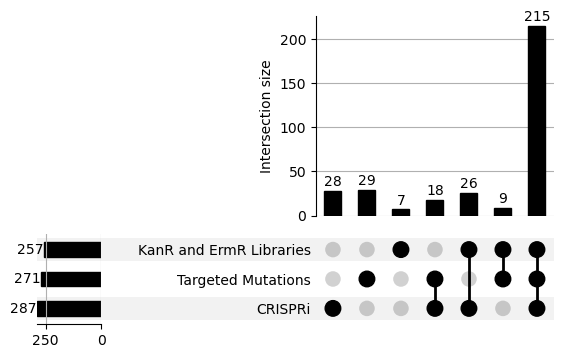

In [357]:
# Plot in an upset plot
from upsetplot import UpSet
from upsetplot import from_memberships
import matplotlib.pyplot as plt

# Option A: Use BG_IDs
set1 = set(kb_ess_final['Gene'])
set2 = set(ps_ess_final['Gene'])
set3 = set(koo_ess_final['Gene'])

# Define each dataset’s name
memberships = []

all_ids = set1.union(set2).union(set3)
for bgid in all_ids:
    sources = []
    if bgid in set1:
        sources.append("Targeted Mutations")
    if bgid in set2:
        sources.append("CRISPRi")
    if bgid in set3:
        sources.append("KanR and ErmR Libraries")
    memberships.append(sources)

# Convert to a proper format
data = from_memberships(memberships)

# Plot
UpSet(data, subset_size='count', show_counts=True).plot()
plt.tight_layout()

pyplot.savefig('UpSetPlot_of_Shared_Essential_Genes_B_Subtilis.pdf', bbox_inches='tight', pad_inches=0.2)

In [360]:
# For further analysis via OrthoDB, we first need to format the set of shared genes between sequences
kb_ess_final['Targeted_Mutations_Essential_B_Subtilis'] = 1
ps_ess_final['KanR_ErmR_Libraries_Essential_B_Subtilis'] = 1
koo_ess_final['CRISPRi_Essential_B_Subtilis'] = 1

/var/folders/_4/d5mt3z054svbl3nmjccm34yc0000gn/T/ipykernel_64423/3754823514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kb_ess_final['Targeted_Mutations_Essential_B_Subtilis'] = 1


In [363]:
t0 = pd.merge(kb_ess_final, ps_ess_final, on='Uniprot_ID', how='outer')
t1 = pd.merge(t0, koo_ess_final, on='Uniprot_ID', how='outer')

In [365]:
t1["Targeted_Mutations_Essential_B_Subtilis"] = t1["Targeted_Mutations_Essential_B_Subtilis"].fillna(0).astype(int)
t1["KanR_ErmR_Libraries_Essential_B_Subtilis"] = t1["KanR_ErmR_Libraries_Essential_B_Subtilis"].fillna(0).astype(int)
t1["CRISPRi_Essential_B_Subtilis"] = t1["CRISPRi_Essential_B_Subtilis"].fillna(0).astype(int)

In [369]:
t1["BG_ID_final"] = (
    t1.get("BG_ID_x")
    .combine_first(t1.get("BG_ID_y"))
    .combine_first(t1.get("BG_ID"))
)

t1["Gene_final"] = (
    t1.get("Gene_x")
    .combine_first(t1.get("Gene_y"))
    .combine_first(t1.get("Gene"))
)

In [380]:
merged = t1[['Uniprot_ID', 'Targeted_Mutations_Essential_B_Subtilis', 'KanR_ErmR_Libraries_Essential_B_Subtilis',
   'CRISPRi_Essential_B_Subtilis', 'BG_ID_final', 'Gene_final']]

In [381]:
merged = merged.rename(columns={'BG_ID_final':'BG_ID', 'Gene_final':'Gene'})

In [382]:
merged[merged['Uniprot_ID'].isna()]
# NaN values are RNA-- hence no Uniprot IDs, so we're good to drop them!

,Uniprot_ID,Targeted_Mutations_Essential_B_Subtilis,KanR_ErmR_Libraries_Essential_B_Subtilis,CRISPRi_Essential_B_Subtilis,BG_ID,Gene
330,NaN,0,1,0,BG00095,scr
331,NaN,0,1,0,BG00045,rnpB


In [394]:
merged = merged[merged['Uniprot_ID'].isna() == False].reset_index(drop=True)
merged.to_csv('./B_Subtilis_Essential_Genes_with_Uniprot_IDs.csv')

In [419]:
# Now see that I could use the BSUs to pull from OrthoDB-- use the koo and peters sets to make a mega
# list, then apply to our final formatted df
df_list = []
ks = koo_ess[['locus tag', 'gene']].rename(columns={'locus tag':'BSU_ID', 'gene':'Gene'})
to_add = [koo_erm, koo_kan, ks, ps_ess]
for dframe in to_add:
    print(dframe.columns)
    df_list.append(dframe[['BSU_ID', 'Gene']])

full = pd.concat(df_list)

Index(['BSU_ID', 'Gene', 'BKE#'], dtype='object')
Index(['BSU_ID', 'Gene', 'BKE_ID'], dtype='object')
Index(['BSU_ID', 'Gene'], dtype='object')
Index(['Gene', 'Synonyms', 'BSU_ID', 'Essentiality_BMK'], dtype='object')


In [422]:
full = full.drop_duplicates()

In [430]:
pd.merge(merged, full, on='Gene').to_csv('../OrthoDB/essential_gene_sets/B_Subtilis_Essential_Genes_with_Uniprot_IDs_and_BSU.csv')